In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import clear_output

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm

from qiskit import QuantumCircuit
from qiskit.circuit.library import TwoLocal, ZZFeatureMap, RealAmplitudes, EfficientSU2
from qiskit.primitives import Sampler


from qiskit_machine_learning.algorithms.classifiers import VQC

from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.gradients import ParamShiftSamplerGradient, SPSASamplerGradient
from qiskit_machine_learning.optimizers import COBYLA, ADAM, SPSA
from qiskit.transpiler import PassManager



In [5]:
iris_data = load_iris()
features = iris_data.data
labels = iris_data.target

num_features = features.shape[1]
features = MinMaxScaler().fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=42
)

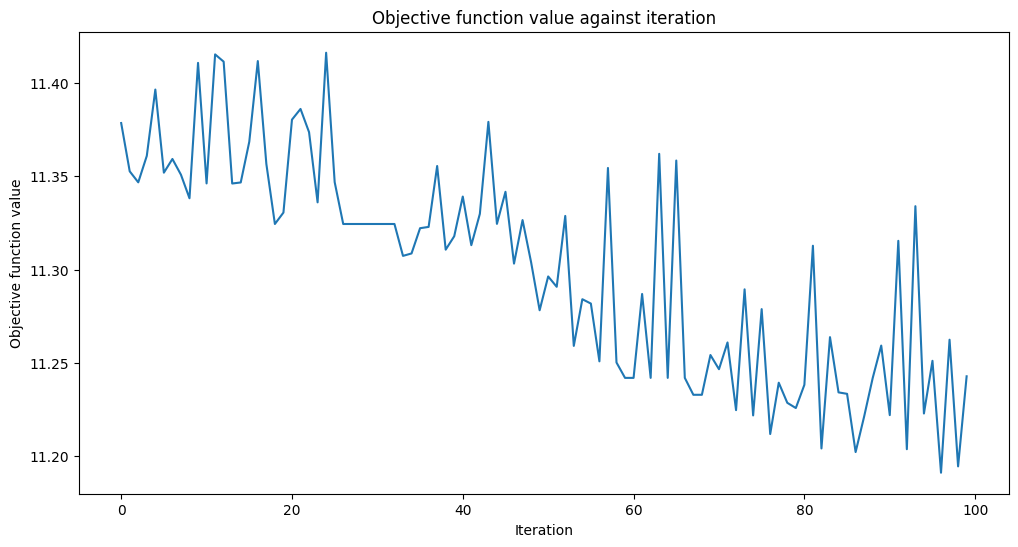

Training time: 27 seconds


In [9]:
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz = EfficientSU2(num_qubits=num_features, reps=3)

optimizer = COBYLA(maxiter=100)
sampler = Sampler()

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [11]:
train_score_q4_ra = vqc.score(train_features, train_labels)
test_score_q4_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC RealAmplitudes on the training dataset: {train_score_q4_ra:.2f}")
print(f"Quantum VQC RealAmplitudes on the test dataset:     {test_score_q4_ra:.2f}")

Quantum VQC RealAmplitudes on the training dataset: 0.65
Quantum VQC RealAmplitudes on the test dataset:     0.60
